In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
random_state=42
cv=5
scoring='roc_auc'
verbose=2

In [3]:
df=pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df=df.drop(['YearsSinceLastPromotion'],axis=1)

Feature Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [7]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)

In [8]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [9]:
for col in cat_df.columns:
    transform(col)

['No' 'Yes']
['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['Y']
['No' 'Yes']


In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,3,1,80,0,8,0,1,6,4,5
1,49,0,1,279,1,8,1,1,1,2,...,4,4,80,1,10,3,3,10,7,7
2,37,1,2,1373,1,2,2,4,1,4,...,3,2,80,0,7,3,3,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,3,80,0,8,3,3,8,7,0
4,27,0,2,591,1,2,1,3,1,7,...,3,4,80,1,6,3,3,2,2,2


In [11]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaled_df = scaler.fit_transform(df.drop('Attrition', axis=1))
# X = scaled_df
# y = df['Attrition'].values
# X.shape,y.shape
X=df.drop('Attrition', axis=1)
y = df['Attrition'].values

Feature Selection

In [12]:
# from sklearn.feature_selection import SelectKBest,chi2
# ktop = SelectKBest(chi2,k=10).fit(X,y)
# X_fe=ktop.fit_transform(X,y)

In [13]:
X_fe.shape,y.shape,X.shape

((1470, 10), (1470,), (1470, 33))

Standard Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
X = scaled_df
scaled_df = scaler.fit_transform(X_fe)
X_fe = scaled_df
y = df['Attrition'].values
X.shape,y.shape,X_fe.shape

((1470, 33), (1470,), (1470, 10))

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_fe_train,X_fe_test,y_fe_train,y_fe_test=train_test_split(X_fe,y,test_size=0.25,random_state=42)

In [16]:
X_fe_train.shape,X_fe_test.shape,y_fe_train.shape,y_fe_test.shape

((1102, 10), (368, 10), (1102,), (368,))

Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


C_val = uniform(loc=0, scale=4)
lr=LogisticRegression(verbose=verbose,random_state=random_state,class_weight='balanced',max_iter=500,n_jobs=-1)
parameters={'C':C_val}
clf=RandomizedSearchCV(lr,parameters,verbose=verbose,cv=cv,random_state=random_state,scoring=scoring,n_iter=100,n_jobs=-1)
best_model=clf.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [18]:
y_pred=best_model.predict(X_test)
test_acc_lr=accuracy_score(y_test,y_pred)*100
test_acc_lr

75.54347826086956

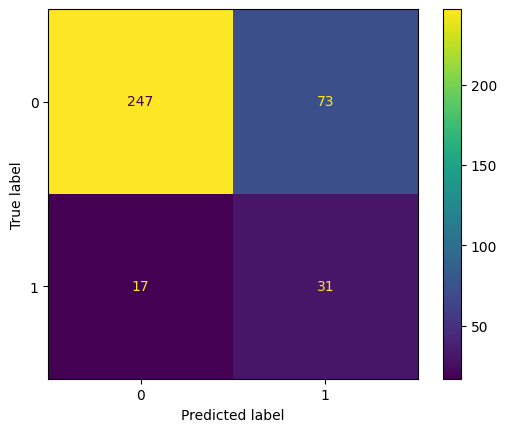

In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_model.classes_)
disp.plot()
plt.show()

Logistic Regression (Feature Selection)

In [20]:
C_val = uniform(loc=0, scale=4)
lr=LogisticRegression(verbose=verbose,random_state=random_state,class_weight='balanced',max_iter=500,n_jobs=-1)
parameters={'C':C_val}
clf=RandomizedSearchCV(lr,parameters,verbose=verbose,cv=cv,random_state=random_state,scoring=scoring,n_iter=100,n_jobs=-1)
best_model=clf.fit(X_fe_train,y_fe_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [21]:
y_fe_pred=best_model.predict(X_fe_test)
test_fe_acc_lr=accuracy_score(y_fe_test,y_fe_pred)*100
test_fe_acc_lr

73.09782608695652

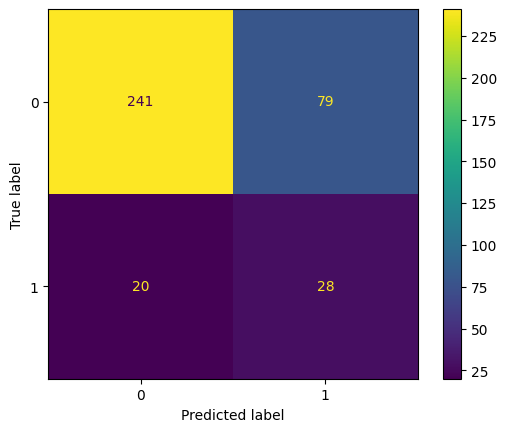

In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_fe_test,y_fe_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_model.classes_)
disp.plot()
plt.show()

In [23]:
from prettytable import PrettyTable
x = PrettyTable(['Model', 'Feature', 'Accuracy'])
x.add_row(['Logistic Regression', '-', round(test_acc_lr,5)])
x.add_row(['Logistic Regression','Feature Seclection', round(test_fe_acc_lr,5)])
print(x)

+---------------------+--------------------+----------+
|        Model        |      Feature       | Accuracy |
+---------------------+--------------------+----------+
| Logistic Regression |         -          | 75.54348 |
| Logistic Regression | Feature Seclection | 73.09783 |
+---------------------+--------------------+----------+


KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs=-1)
from sklearn.model_selection import RandomizedSearchCV
k_range=np.arange(1,100,5)
param_grid=dict(n_neighbors=k_range)
grid=RandomizedSearchCV(knn,param_grid,cv=cv,random_state=random_state,scoring=scoring,verbose=verbose)
grid_serch=grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END .....................................n_neighbors=86; total time=   0.0s
[CV] END .....................................n_neighbors=86; total time=   0.0s
[CV] END .....................................n_neighbors=86; total time=   0.0s
[CV] END .....................................n_neighbors=86; total time=   0.0s
[CV] END .....................................n_neighbors=86; total time=   0.0s
[CV] END .....................................n_neighbors=76; total time=   0.0s
[CV] END .....................................n_

In [25]:
grid_serch.best_params_

{'n_neighbors': 76}

In [26]:
y_pred=grid_serch.predict(X_test)
test_acc_knn=accuracy_score(y_test,y_pred)*100
test_acc_knn

86.95652173913044

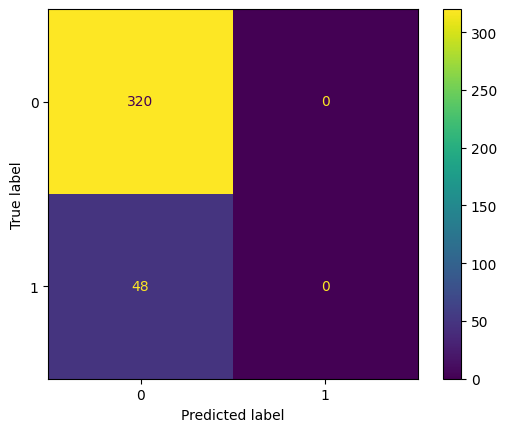

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_serch.classes_)
disp.plot()
plt.show()

KNN(Feature Selection)

In [28]:
knn = KNeighborsClassifier(n_jobs=-1)
from sklearn.model_selection import RandomizedSearchCV
k_range=np.arange(1,100,5)
param_grid=dict(n_neighbors=k_range)
grid=RandomizedSearchCV(knn,param_grid,cv=cv,random_state=random_state,scoring=scoring,verbose=verbose)
grid_serch=grid.fit(X_fe_train,y_fe_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END .....................................n_neighbors=86; total time=   0.0s
[CV] END .....................................n_neighbors=86; total time=   0.0s
[CV] END .....................................n_neighbors=86; total time=   0.0s
[CV] END .....................................n_neighbors=86; total time=   0.0s
[CV] END .....................................n_neighbors=86; total time=   0.0s
[CV] END .....................................n_neighbors=76; total time=   0.0s
[CV] END .....................................n_

In [29]:
grid_serch.best_params_

{'n_neighbors': 41}

In [30]:
y_fe_pred=grid_serch.predict(X_fe_test)
test_fe_acc_knn=accuracy_score(y_fe_test,y_fe_pred)*100
test_fe_acc_knn

87.22826086956522

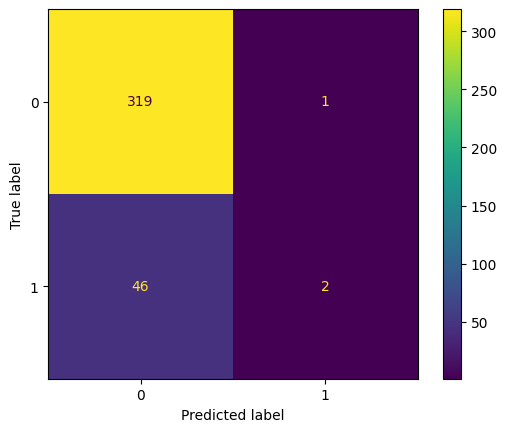

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_fe_test,y_fe_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_serch.classes_)
disp.plot()
plt.show()

In [32]:
from prettytable import PrettyTable
x = PrettyTable(['Model', 'Feature', 'Accuracy'])
x.add_row(['KNN', '-', round(test_acc_knn,5)])
x.add_row(['KNN','Feature Seclection', round(test_fe_acc_knn,5)])
print(x)

+-------+--------------------+----------+
| Model |      Feature       | Accuracy |
+-------+--------------------+----------+
|  KNN  |         -          | 86.95652 |
|  KNN  | Feature Seclection | 87.22826 |
+-------+--------------------+----------+


Decision Tree

In [33]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [34]:
param_dist = {"max_depth": [3, None],"max_features": randint(1, 9),"min_samples_leaf": randint(1, 9),"criterion": ["gini", "entropy"]}

In [35]:
tree = DecisionTreeClassifier()
clf=RandomizedSearchCV(tree, param_dist,verbose=verbose,cv=cv,random_state=random_state,scoring=scoring,n_iter=100,n_jobs=-1)
best_model=clf.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [36]:
best_model.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 6,
 'min_samples_leaf': 8}

In [37]:
y_pred=best_model.predict(X_test)
test_acc_dt=accuracy_score(y_test,y_pred)*100
test_acc_dt

86.68478260869566

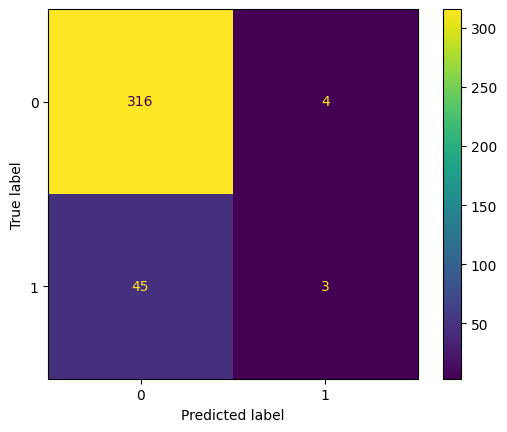

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_model.classes_)
disp.plot()
plt.show()

Decision Tree(Feature Selection)

In [39]:
tree = DecisionTreeClassifier()
clf=RandomizedSearchCV(tree, param_dist,verbose=verbose,cv=cv,random_state=random_state,scoring=scoring,n_iter=100,n_jobs=-1)
best_model=clf.fit(X_fe_train,y_fe_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [40]:
best_model.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 8,
 'min_samples_leaf': 7}

In [41]:
y_fe_pred=best_model.predict(X_fe_test)
test_fe_acc_dt=accuracy_score(y_fe_test,y_fe_pred)*100
test_fe_acc_dt

85.86956521739131

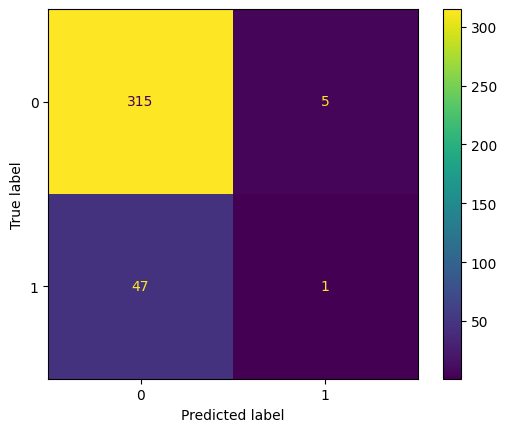

In [42]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_fe_test,y_fe_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_model.classes_)
disp.plot()
plt.show()

In [43]:
from prettytable import PrettyTable
x = PrettyTable(['Model', 'Feature', 'Accuracy'])
x.add_row(['Decision Tree', '-', round(test_acc_dt,5)])
x.add_row(['Decision Tree','Feature Seclection', round(test_fe_acc_dt,5)])
print(x)

+---------------+--------------------+----------+
|     Model     |      Feature       | Accuracy |
+---------------+--------------------+----------+
| Decision Tree |         -          | 86.68478 |
| Decision Tree | Feature Seclection | 85.86957 |
+---------------+--------------------+----------+


Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
param_grid = {
    'n_estimators': np.arange(10, 500, 10),
    'max_depth': np.arange(1, 20),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=random_state, class_weight='balanced', n_jobs=-1)
clf = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=100, cv=cv, verbose=verbose, random_state=random_state, n_jobs=-1, scoring=scoring)
best_model = clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [46]:
best_model.best_params_

{'n_estimators': 170,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 8,
 'bootstrap': True}

In [47]:
y_pred=best_model.predict(X_test)
test_acc_rf=accuracy_score(y_test,y_pred)*100
test_acc_rf

86.95652173913044

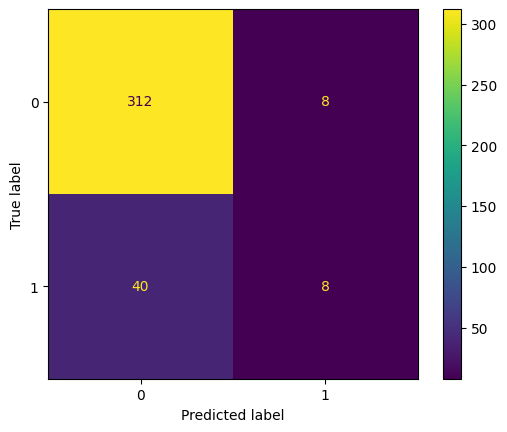

In [48]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_model.classes_)
disp.plot()
plt.show()

Random Forest(Feature Selection)

In [49]:
param_grid = {
    'n_estimators': np.arange(10, 500, 10),
    'max_depth': np.arange(1, 20),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=random_state, class_weight='balanced', n_jobs=-1)
clf = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=100, cv=cv, verbose=verbose, random_state=random_state, n_jobs=-1, scoring=scoring)
best_model = clf.fit(X_fe_train, y_fe_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [50]:
best_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 3,
 'bootstrap': False}

In [51]:
y_fe_pred=best_model.predict(X_fe_test)
test_fe_acc_rf=accuracy_score(y_fe_test,y_fe_pred)*100
test_fe_acc_rf

75.27173913043478

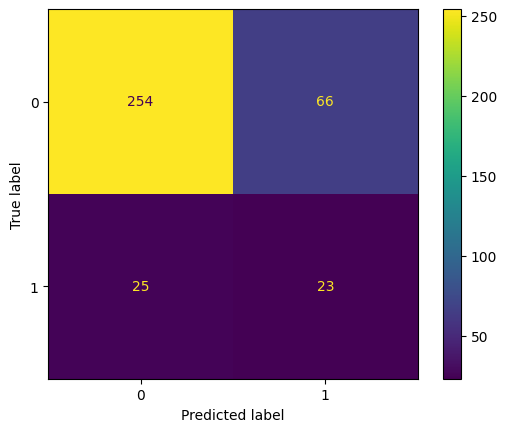

In [52]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_fe_test,y_fe_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_model.classes_)
disp.plot()
plt.show()

In [53]:
from prettytable import PrettyTable
x = PrettyTable(['Model', 'Feature', 'Accuracy'])
x.add_row(['Random Forest', '-', round(test_acc_rf,5)])
x.add_row(['Random Forest','Feature Seclection', round(test_fe_acc_rf,5)])
print(x)

+---------------+--------------------+----------+
|     Model     |      Feature       | Accuracy |
+---------------+--------------------+----------+
| Random Forest |         -          | 86.95652 |
| Random Forest | Feature Seclection | 75.27174 |
+---------------+--------------------+----------+


Accuracy (Raw Data)

In [54]:
from prettytable import PrettyTable
x = PrettyTable(['Model', 'Feature', 'Accuracy'])
x.add_row(['Logistic Regression', '-', round(test_acc_lr,5)])
x.add_row(['KNN', '-', round(test_acc_knn,5)])
x.add_row(['Decision Tree', '-', round(test_acc_dt,5)])
x.add_row(['random Forest', '-', round(test_acc_rf,5)])
print(x)

+---------------------+---------+----------+
|        Model        | Feature | Accuracy |
+---------------------+---------+----------+
| Logistic Regression |    -    | 75.54348 |
|         KNN         |    -    | 86.95652 |
|    Decision Tree    |    -    | 86.68478 |
|    random Forest    |    -    | 86.95652 |
+---------------------+---------+----------+


Accuracy (Feature Selection(10))

In [57]:
from prettytable import PrettyTable
x = PrettyTable(['Model', 'Feature', 'Accuracy'])
x.add_row(['Logistic Regression', 'Feature Selection(10)', round(test_fe_acc_lr,5)])
x.add_row(['KNN', 'Feature Selection(10)', round(test_fe_acc_knn,5)])
x.add_row(['Decision Tree', 'Feature Selection(10)', round(test_fe_acc_dt,5)])
x.add_row(['random Forest', 'Feature Selection(10)', round(test_fe_acc_rf,5)])
print(x)

+---------------------+-----------------------+----------+
|        Model        |        Feature        | Accuracy |
+---------------------+-----------------------+----------+
| Logistic Regression | Feature Selection(10) | 73.09783 |
|         KNN         | Feature Selection(10) | 87.22826 |
|    Decision Tree    | Feature Selection(10) | 85.86957 |
|    random Forest    | Feature Selection(10) | 75.27174 |
+---------------------+-----------------------+----------+


We Can observe that the best model is Random Forest for the HR Attrition Employee Dataset